# Lab 1: Python, Jupyter Notebooks, NumPy and an Introduction to Scikit-learn

This lab introduces Jupyter Notebooks and key Python libraries (such as NumPy and Matplotlib) as well as introducing scikit-learn, a popular machine learning library. It assumes you know the basics of the Python language, so if you need to, check out the University of Bristol [Beginning Python](https://milliams.com/courses/beginning_python/) course. (That's a course created by Matt Williams: you may find his [other online training materials](https://milliams.com/courses/) useful.) Finally, this lab will have some exercises where you use Scikit-learn for linear and logistic regression.

The following libraries will be used throughout the unit:

- [NumPy](http://docs.scipy.org/doc/numpy/index.html), for scientific computation
- [Pandas](https://pandas.pydata.org/docs/reference/index.html), for data analysis
- [Matplotlib](http://matplotlib.org/contents.html), to plot any kind of data
- [Scikit-learn](https://scikit-learn.org/stable/user_guide.html), for machine learning

The libraries above have complete and very good documentation which can be used to learn other features of the libraries or for questions and examples. The documentation is available either online (links above) or via Python itself, e.g. `help(numpy.array)` in the Python interpreter.

If you are using the machines supplied in the lab rooms you can ensure you have access to all these libraries by following the Lab Work instructions given on [the unit github page](https://uob-coms30035.github.io/).

If you are using your own machine then note that the following libraries are required for this lab so make sure these are installed using pip3 or Anaconda (recommended to use a virtual environment):
- numpy
- pandas
- matplotlib
- seaborn
- scikit-learn
- scikit-image
- jupyterlab

For example, to install scikit-learn in a new conda environment, run
```
$ conda create -n COMS30035_labs
$ conda activate COMS30035_labs 
$ conda install scikit-learn
```
For further help see the installation guides on the libraries documentation.

## Jupyter Notebook

This module's labs will be run on [Jupyter Lab](http://jupyter.org/), an interactive coding environment embedded in a webpage supporting various programming languages (Python, R, Lua, etc.) through the concept of kernels. From a command line, ```cd``` to the directory containing your lab notebooks, then call ```jupyter lab``` and open the relevant lab notebook. One convenient way of opening a Jupyter notebook is to click on the folder icon on the top left of the Jupyter Lab window, then navigate to the desired Jupyter notebook file and then double-click on it to open it. All Jupyter notebooks have a ```.ipynb``` file extension.

Jupyter allows you to enrich your code with complex comments formatted in Markdown and $\LaTeX$, as well as to place the results of your computation right below your code.

Notebooks are organised in cells which can contain either code (in our case, this will be Python code) or text, which can be easily and nicely formatted using the Markdown notation. 

To edit an already existing cell simply double-click on it. You can use the toolbar to insert new cells, edit and delete them (or use keyboard shortcuts which are very handy to speed up coding). 

Cells can be run, by hitting `shift+enter` when editing a cell or by clicking on the `Run` button at the top. Running a Markdown cell will simply display the formatted text, while running a code cell will execute the commands executed in it. While the code in a code cell is being executed there will be `[*]` to the left of the cell.

**Note**: when you run a code cell, all the created variables, implemented functions and imported libraries will be then available to every other code cell. However, it is commonly assumed that cells will be run sequentially in terms of prerequisites. To reset all variables and functions (for debugging) simply click `Kernel > Restart` from the Jupyter menu.

#### A bit on Markdown language (and a bit of LaTeX and HTML) if you're interested

Markdown cells allow you to write fancy and simple comments: all of this is written in Markdown - double click on this cell to see the source. Introduction to Markdown syntax can be found [here](https://daringfireball.net/projects/markdown/syntax).

As Markdown is translated to HTML upon displaying it also allows you to use pure HTML: more details are available [here](https://daringfireball.net/projects/markdown/syntax#html).

Finally, you can also display simple $\LaTeX$ equations in Markdown thanks to `MathJax` support. For inline equations wrap your equation between `$` symbols: $\frac{x}{y}=z$; for display mode equations use `$$`: $$\frac{x}{y}=z$$

Note that this method of displaying equations does not always work smoothly. Sometimes it is necessary to re-execute the cell containing the equations.


## Importing the libraries

Before we start this lab we need to import the aforementioned libraries, using the `import` keyword and bind the libraries to the `np`, `pd` and `plt` etc namespaces with the `as` keyword. Run the cell below by selecting it and doing `shift+enter` (or using the 'play' icon at the top). This is how you should execute all code cells, either those with code written by you or with pre-supplied code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimage import io
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

## 1) NumPy 

NumPy is designed for scientific computing. NumPy defines its own multidimensional array which can be created with:

``` Python
np.array([[1, 2], [3, 4], [5, 6]])
```
- For more details, type `help(np.array)` in your Python console or visit online help [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html). 

#### 1.1) Array operations

Create two arrays, `A` and `B`:

``` Python
A = np.array([[2, 3], [4, -1], [5, 6]])
B = np.array([[5, 2], [8, 9], [2, 1]])
```

and perform the following operations, printing the array C (yes, you may need to consult the numpy documentation!):

- $C = 3A$
- $C = A + B$
- $C = AB^T$ (dot product or inner product)
- $C = A \odot B$ (Hadamard product or elementwise product)

In [2]:
# write your code here
A = np.array([[2, 3], [4, -1], [5, 6]])
B = np.array([[5, 2], [8, 9], [2, 1]])

print(3 * A)
print(A + B)
print(np.dot(A, B.T))
print(A * B)

[[ 6  9]
 [12 -3]
 [15 18]]
[[ 7  5]
 [12  8]
 [ 7  7]]
[[16 43  7]
 [18 23  7]
 [37 94 16]]
[[10  6]
 [32 -9]
 [10  6]]


#### 1.2) More array operations

Calculate now the *sum*, *mean*, and *variance* of the matrix `A`, using `NumPy` functions/array properties `mean`, `sum`, `var`.

Hint: `help(np.sum)` or look [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html).  
Hint: `help(np.mean)` or look [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).  
Hint: `help(np.var)` or look [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html#numpy.var).

Afterwards, calculate the *sum* of the rows and then the columns of `A`. Hint, specify the parameter `axis`.

In [3]:
# write your code here
print(np.sum(A))
print(np.mean(A))
print(np.var(A))

19
3.1666666666666665
5.138888888888888


#### 1.3) Implement the sigmoid function using numpy. 

The sigmoid function is a non-linear function used in machine learning (logistic regression) and also deep learning (as an activation function). 

$$sigmoid(x) = \frac{1}{1+e^{-x}}$$

where $x$ could now be either a real number, a vector, or a matrix.

Implement the sigmoid function by defining a function called `sigmoid` which takes 1 argument $x$, a scalar or numpy array of any size and outputs the $sigmoid(x)$.

In [4]:
# write your code here
def sigmoid(x):
    return 1/(1 + np.exp(-x))

What is the sigmoid of the array:
``` Python
A = np.array([-5, 0, 5])
```
Plot the sigmoid curve for $ x \in [-5, 5] $. Hint, use numpy [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) or [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html).

Text(0, 0.5, 'sigmoid(x)')

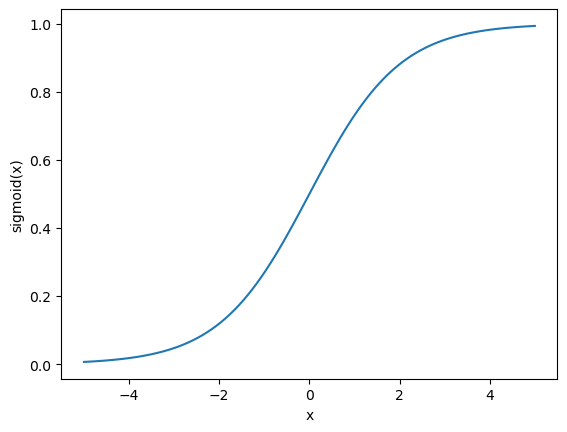

In [5]:
# write your code here
x = np.linspace(-5, 5, 100)
fig, ax = plt.subplots()
ax.plot(x, sigmoid(x))
ax.set_xlabel('x')
ax.set_ylabel('sigmoid(x)')

#### 1.4) Standardise columns using numpy

A common technique used in machine learning is to standardise the data to ensure all features have values that lie on a comparable scale. Standardisation helps with the visualisation of data but can also help with convergence. Note that standardisation removes information from the data so can be harmful in some cases.

To standardise a dataset we centre the data by subtracting the mean of each feature, then scale by dividing by the standard deviation of the feature. Assuming the data is arranged with features in columns and training instances in rows, standardisation will result in each column vector of the data matrix having a mean of 0 and standard deviation of 1.

Implement a `standardiseCols(x)` function to standardise the columns of a numpy array.

Note, in Python you are able to perform mathematical operations between arrays of different shapes (such as substracting the row vector of means from a matrix) due to broadcasting, for more information read [here](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

In [6]:
# write your code here
def standardiseCols(x):
    x_means = x.mean(axis=0, keepdims=True)
    x_std = x.std(axis=0, keepdims=True)
    return (x - x_means) / x_std
        

Standardise the columns of the array below by calling the `standardiseCols(x)` function:
``` Python
x = np.array([
    [0, 3, 5],
    [1, 6, 4],
    [3, -2, 8],
    [-1, 1, 10]
])
```
Print the mean and standard deviation of the columns of the standardised array.

In [7]:
# write your code here
stcols = standardiseCols(x)
print(stcols.mean())
print(stcols.std())

-4.662936703425657e-17
1.0


#### 1.5) Reshaping numpy arrays 

The attribute [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and function [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) are commonly used in machine learning:
- X.shape is used to get the shape (dimension) of a matrix/vector X. 
- X.reshape(...) is used to create a new array containing the elements of X with the provided shape. 

For example, in computer vision, an image is represented by a 3D array of shape $(length, height, colour)$ where the colour represents the three RGB (red, green, blue) channels. Let's first load and plot the image. In order for the image to be given as an input into a machine learning algorithm, the 3D array needs to be reshaped to a vector of shape $(length \times height \times 3, 1)$, that's your task below.

/tmp/ipykernel_7253/1149769163.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image)


(900, 1440, 3)

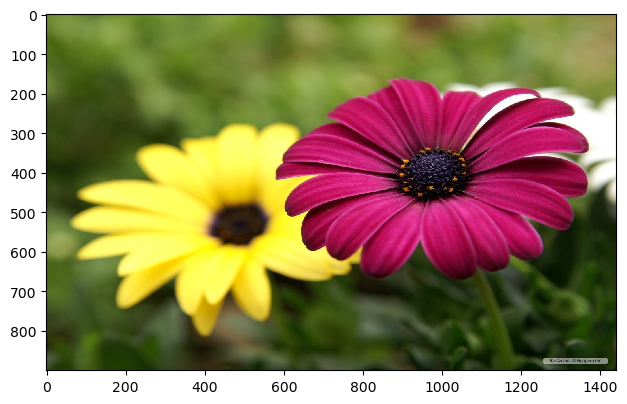

In [8]:
image = io.imread('flower.png')
io.imshow(image)
image.shape

Reshape the $image$ array to vector $v$ and print the shape of the created vector:

In [9]:
# write your code here
dimensions = image.shape

reshaped = image.reshape((dimensions[0] * dimensions[1] * dimensions[2]), 1)
print(reshaped.shape)

(3888000, 1)


#### Note on array dimensions
The array $a$ below is a 1-dimensional array which has some slightly non-intuitive effects, such as the transpose is the same.

In [10]:
a = np.arange(5)
print(a)
print(a.shape)
print(a.T)
print(a.T.shape)

[0 1 2 3 4]
(5,)
[0 1 2 3 4]
(5,)


We can reshape a 1-D array into a 2-D array which behaves more naturally when we do a transpose. We can either have the original 1-D array as the only row of a 2-D array with shape (1,5) or as the only column of a 2-D array with shape (5,1). 

To get the single row 2-D array:

In [11]:
a = a.reshape(1,-1)
print(a)
a.shape

[[0 1 2 3 4]]


(1, 5)

To get the single colum 2-D array:

In [12]:
a = a.reshape(-1,1)
print(a)
a.shape

[[0]
 [1]
 [2]
 [3]
 [4]]


(5, 1)

You can check the dimensions are what you want by using the assert command:

In [13]:
assert(a.shape == (5,1))

#### Note on function and object property
As Python is an object oriented language, the difference between *function* and *object property* should be understood.  
An object instance, e.g. NumPy array `A = np.array([[1, 2], [3, 4], [5, 6]])` inherits all the functions from the class `numpy.array`. Therefore, to sum all elements of array `A` we can choose two approaches:

- `A.sum()`, or
- `np.sum(A)`.

the first one is advisable.

Moreover, some objects have *properties* (e.g. shape of an array). Instead of calling the shape *function*, an array object has the shape *property*, i.e.:

- `A.shape`
- `np.shape(A)`

the first one is advisable.

## 2) Scikit-learn
Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It provides various tools for model fitting, data preprocessing, model selection and evaluation as well as many other utilities. The exercises takes you through a very simple workflow for training and evaluating machine learning models.

### Scikit-learn basics

#### 2.1) Datasets
Scikit-learn can be used to import [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) using the dataset loader to load small standard, or 'toy', datasets (such as iris classification or California housing pricing) or the  dataset fetcher to download and load larger dataset from the ‘real world’.

Firstly, load the California housing dataset and print the number of examples and features and feature names in the dataset. Note, [fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) has already been imported (above) from sklearn.datasets. 

Then using seaborn to create a [pairplot](https://seaborn.pydata.org/tutorial/axis_grids.html) (or scatterplot matrix) to show feature joint relationships and individual feature distributions. Note, the data must be in a pandas dataframe.

20640 examples
8 features
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


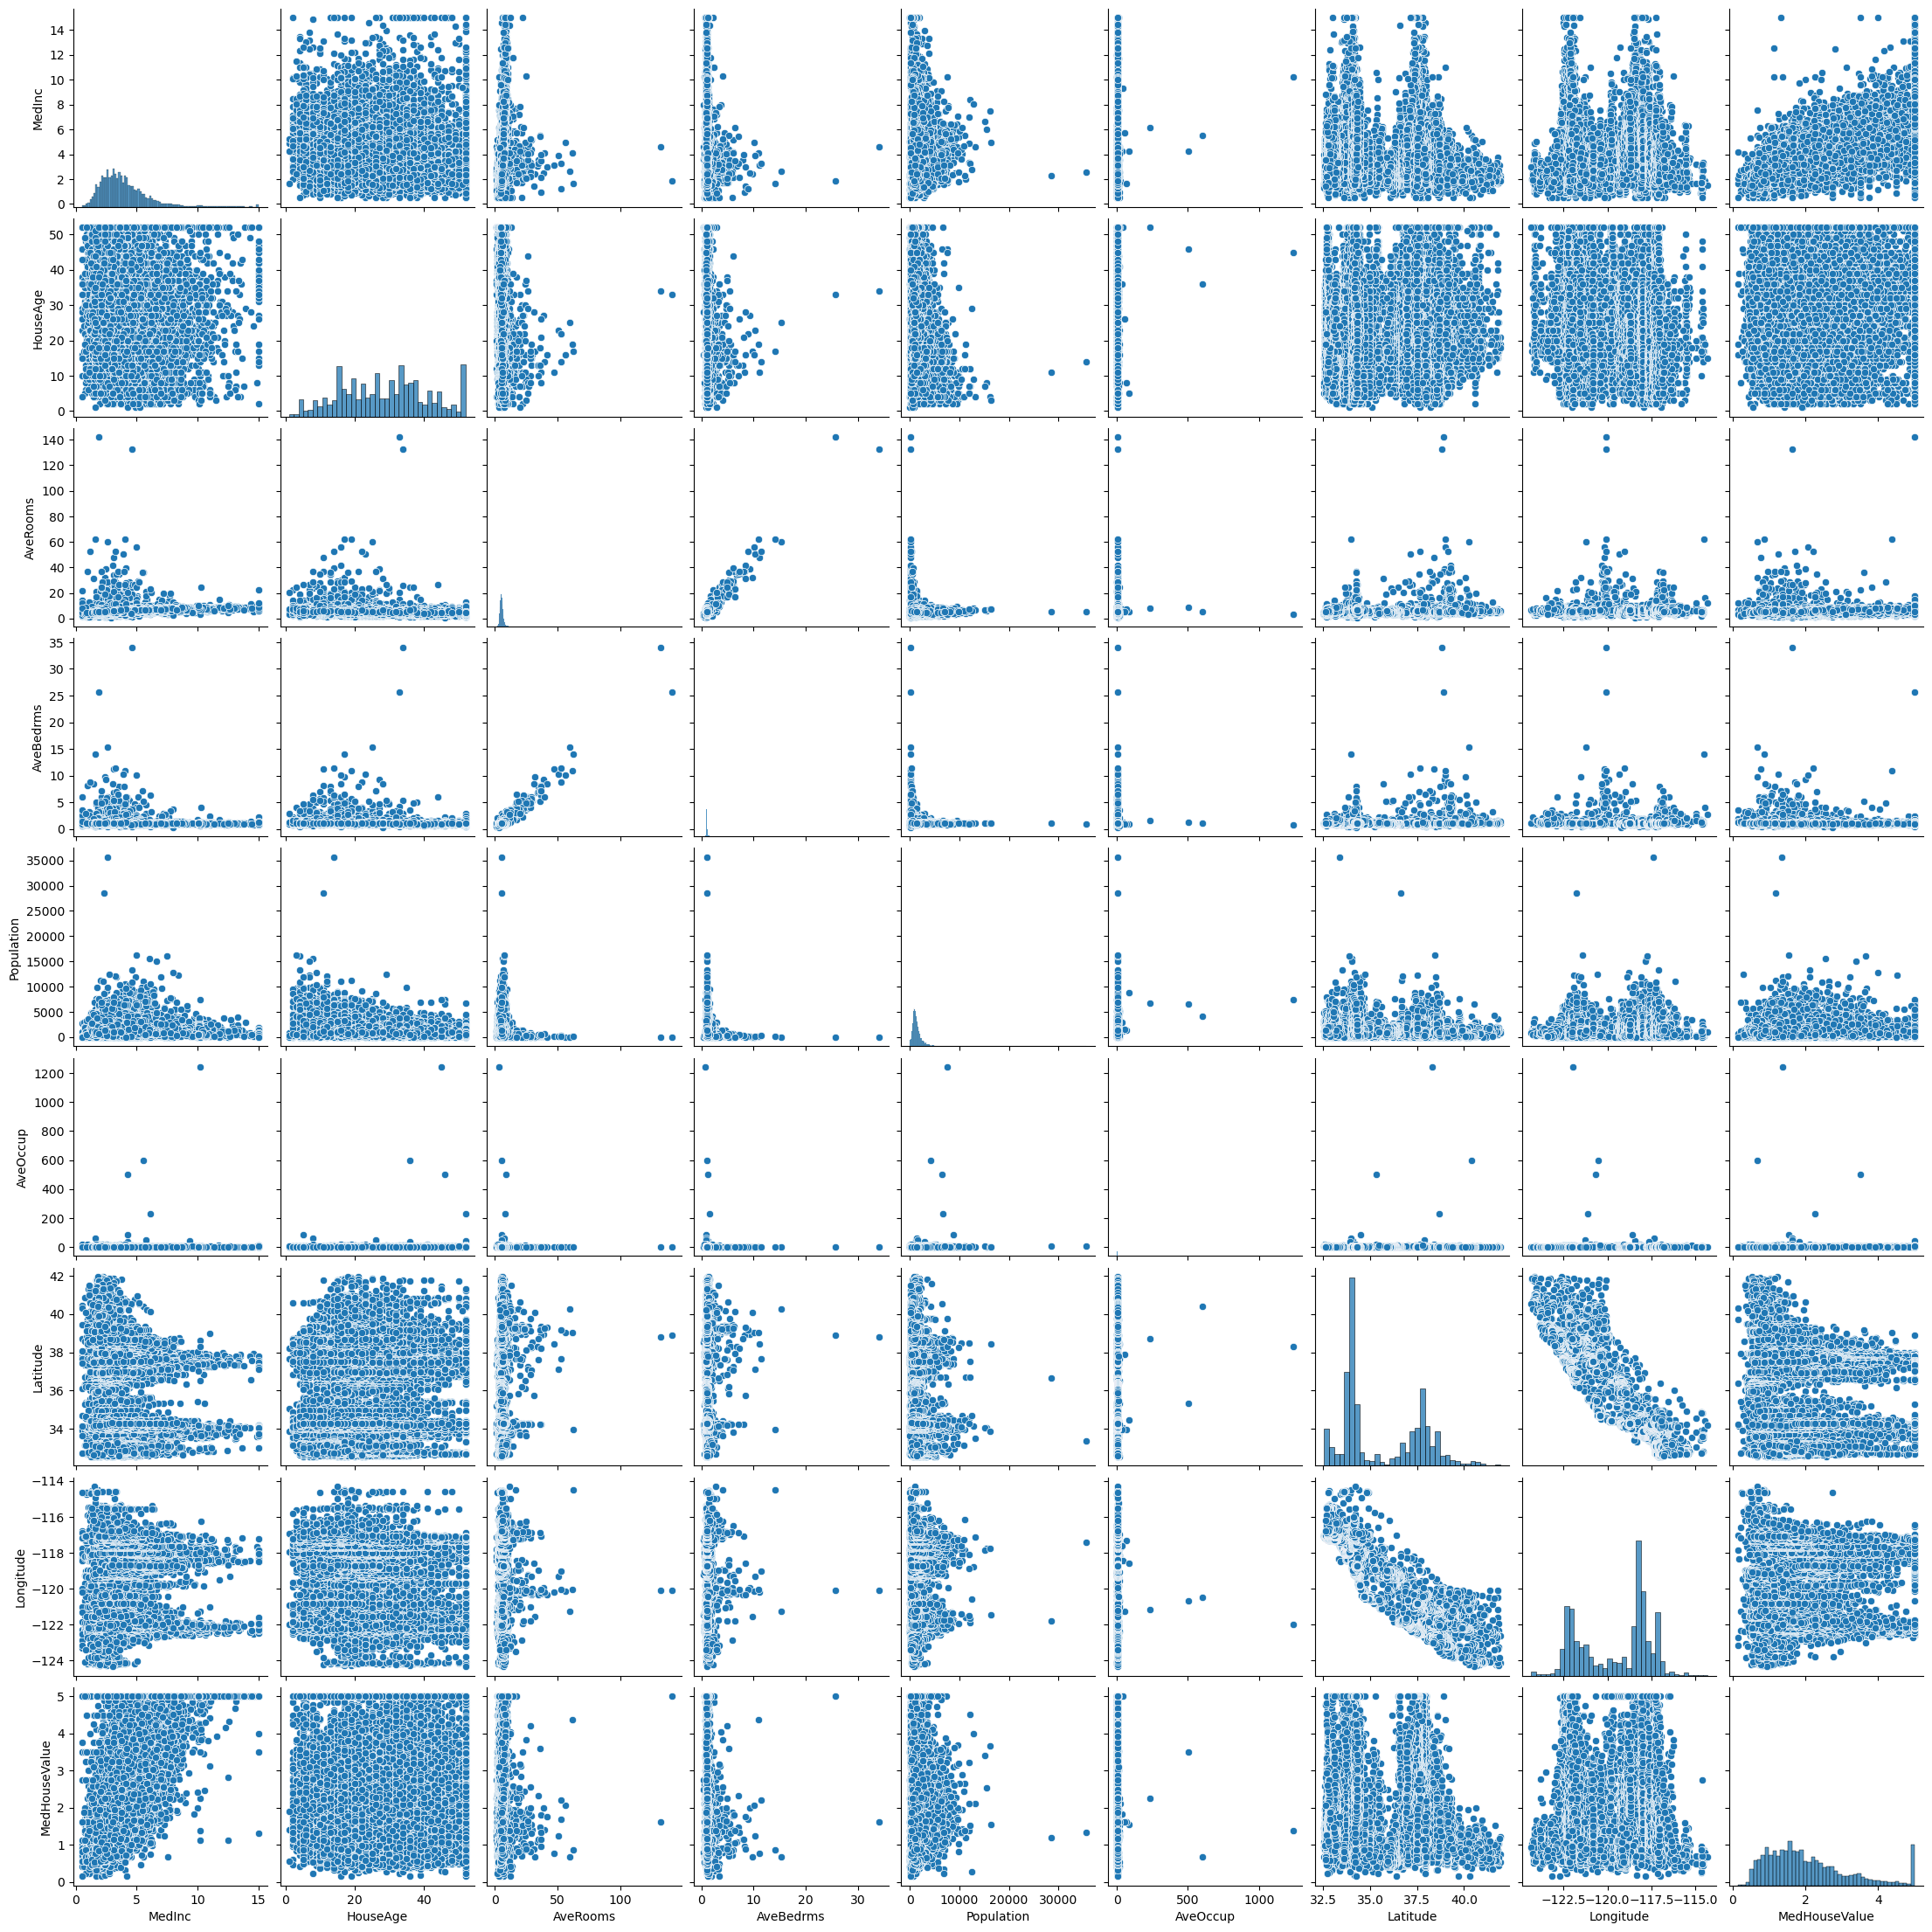

In [14]:
X, y = fetch_california_housing(return_X_y=True)
print(X.shape[0], 'examples')
print(X.shape[1], 'features')
feature_names = fetch_california_housing().feature_names
print(feature_names)

data = pd.DataFrame(X, columns=feature_names)
data['MedHouseValue'] = y
plot = sns.pairplot(data)

Pairplots are a quick and effective way to perform exploratory data analysis (EDA) to find patterns, relationships and anomalies to guide subsequent analysis. A pairplot allows us to see both the distribution of single variables and relationships between two variables.

#### 2.2) Preprocessing
The scikit-learn has a [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) package which provides several common functions to change the raw data into something more suitable for the machine learning algorithm. In general, learning algorithms benefit from standardisation of the dataset or if some outliers are present then robust scalers or transformers are more appropriate.

Standardise the California housing training dataset loaded in the previous exercise using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler). Check the features have zero mean and unit variance/standard deviation.

In [15]:
# write your code here
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print(X_scaled.mean())
print(X_scaled.std())

-1.1890574657535784e-15
0.9999999999999999


#### 2.3) Train test split
Training and evaluating a model on the same dataset will lead to overfitting and poor performance on unseen data. To measure the generalisation ability of a model, it is common practice to hold out part of the available data as a test set. Scikit-learn provides a [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) function which performs a random split into training and testing sets.

When evaluating different hyperparameters for machine learning models then there is still a risk of overfitting on the test set because the parameters can be tweaked until the model performs optimally. To solve this problem, yet another part of the dataset can be held out as a so-called validation set which is used for evaluating hyperparameter values before final evaluation can be done on the test set. However, this can drastically reduce the number of samples which can be used for model training and the performance depends on the training and validation splits. To get round this problem cross-validation can be used which trains multiple models on "folds" of the training set. Read about cross-validation in scikit-learn [here](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).

Your task is to split the California housing (scaled) training data set so 70% of the data is for training and the remaining 30% to test.

How many training examples are there in the training and test sets?

Should the `random_state` parameter be specified for the `train_test_split` function?

In [16]:
# write your code here
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print('Training set size:', len(X_train))
print('Test set size:', len(X_test))


Training set size: 14448
Test set size: 6192


#### 2.4) Model fitting
Scikit-learn provides many built-in machine learning algorithms and models, called estimators. An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data. Each estimator can be fitted to some data using its fit method, as was done on the previous exercise to standardise the raw data.

Fit a simple [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model to the training data from the train-test split.

Print the linear model coefficients. 

In [17]:
# write your code here
reg = LinearRegression().fit(X_train, y_train)
reg.coef_

array([ 8.46962874e-01,  1.21848755e-01, -3.02077128e-01,  3.68977844e-01,
       -8.78475338e-04, -3.50004161e-02, -8.93952910e-01, -8.68886568e-01])

#### 2.5) Model evaluation
Scikit-learn supports simple and quick evaluation of machine learning models using the [metrics](https://scikit-learn.org/stable/api/sklearn.metrics.html) module which quantifies the quality of predictions.

Calculate the root mean squared error (RMSE) of both the training and test sets for the linear model. Is the model overfitting?

Also, plot the model predictions on a [scatter plot](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter) alongside the real values for the test data. All the data points would lie on a diagonal (prediction = real) if the model was 100% accurate.

Text(0, 0.5, 'Prediction')

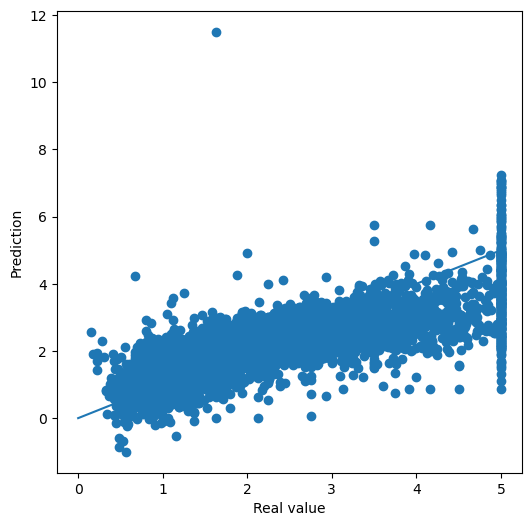

In [18]:
# write your code here
train_predictions = reg.predict(X_train)
test_predictions  = reg.predict(X_test)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(y_test, reg.predict(X_test))
ax.plot([0,5],[0,5])
ax.set_xlabel('Real value')
ax.set_ylabel('Prediction')

## 3) Linear models for regression
Much of machine learning is about fitting functions to data and we begin with linear models, a class of models that are linear functions of the adjustable parameters. The simplest form of linear models are also linear functions of the input variables (simply known as linear regression). For example, for a 3-dimensional (D=3) input $\mathbf{x}=[x_1, x_2, x_3]^T$, linear regression is a linear combination of the input variables plus a constant $b$:

$$ f(\mathbf{x};\mathbf{w},b) = w_1 x_1 + w_2 x_2 + w_3 x_3 + b = \mathbf{w}^T \mathbf{x}  + b \qquad(1) $$

where $\mathbf{w}$ is a 3-dimensional vector of weights and the constant bias $b$ gives the value of the function at the origin.

We want to find the parameters, $\mathbf{w}$, of the linear function that best fits our training dataset of input-output pairs. We will first express our dataset of N examples as an NxD matrix called the *design matrix*, $X$, and the corresponding observed outputs into an Nx1 column vector, $\mathbf{y}$.

$$ \mathbf{y} = \left[ \begin{array}{c}y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(N)} \end{array} \right],
    \qquad
    X = \left[ \begin{array}{c}\mathbf{x}^{(1)\top} \\ \mathbf{x}^{(2)\top} \\ \vdots \\ \mathbf{x}^{(N)\top} \end{array} \right]
    = \left[ \begin{array}{cccc}
        x_1^{(1)} & x_2^{(1)} & \cdots & x_D^{(1)} \\
        x_1^{(2)} & x_2^{(2)} & \cdots & x_D^{(2)} \\
        \vdots & \vdots & \ddots & \vdots \\
        x_1^{(N)} & x_2^{(N)} & \cdots & x_D^{(N)} \\
\end{array} \right] $$

$$ \mathbf{f} = X\mathbf{w} + b \qquad(2) $$

Expressing the data in the form of a matrix and vector allows us to use the notation of linear algebra to derive the solution. This improves readability and maps more closely to how this is implemented efficiently in code with matrix-vector operations.

We can compute the total square error of the function values above, compared to the observed training set values: 

$$ \sum_{n=1}^N [y^{(n)} - f(\mathbf{x}^{(n)};\mathbf{w},b)]^2 = (\mathbf{y}-\mathbf{f})^T(\mathbf{y}-\mathbf{f}) \qquad(3) $$ 

The least-squares fitting problem is to find the parameters that minimise this error.

Note that there is a notational trick that allows for the bias term, $b$, to be omitted from equations 1 and 2 above. If we construct our design matrix to include an additional column/dimension (so that it is now NxD+1) containing a vector of 1's then the bias term can simply be interpreted  as another weight (i.e. $b = \mathbf{w}_{D+1}^{(n)}\mathbf{x}_{D+1}^{(n)}$ where $\mathbf{x}_{D+1}^{(n)} = 1$ for all $n$).

### 3.1) Least squares fitting

We will begin by generating a series of points from a given quadratic (non-linear) equation $y=(x-1)(x-5) = x^2-6x+5$ with normally distributed noise added i.e. $\mathcal{N}(\mu=0,\sigma=5)$.

Text(0, 0.5, 'y')

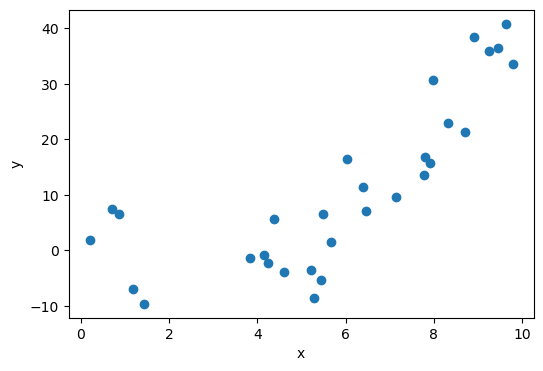

In [19]:
np.random.seed(0)
N = 30
sigma = 5
x = np.sort(np.random.sample((N,1)))*10
y = (x-1)*(x-5) + np.random.normal(0,sigma,N).reshape(-1, 1)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

Fit a linear function to the generated data, print $w_1$ and $b$ (or $w_0$) and plot the learnt function.

Here's what you should do:
- 1) Create the array $X_{bias}$ by concatenating a vector of ones to $X$ (use [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html))
- 2) Calculate $w$ using [np.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)
- 3) Generate predictions $y_{pred}$ for the fitted function
- 4) Plot the learnt linear function alongside the original data points.

w_1 = 4.15
b = -12.84


Text(0, 0.5, 'y')

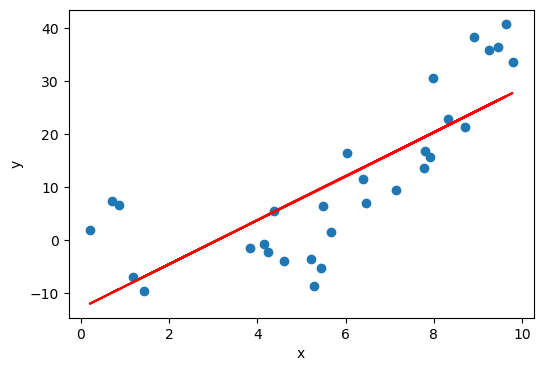

In [20]:
# write your code here
x_bias = np.concatenate((np.ones(N).reshape(-1,1), x), axis=1)

w_fit = np.linalg.lstsq(x_bias, y, rcond=None)[0]
y_pred = np.dot(x_bias, w_fit)

print('w_1 = {:.2f}'.format(w_fit[1].item()))
print('b = {:.2f}'.format(w_fit[0].item()))

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x, y)
ax.plot(x, y_pred, '-r')
ax.set_xlabel('x')
ax.set_ylabel('y')

Now use [scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) to fit the linear model. Do you get the same $w_1$ and $b$ (coefficient and intercept)? Is the model overfitting or underfitting?

w_1 = 4.15
b = -12.84


Text(0, 0.5, 'y')

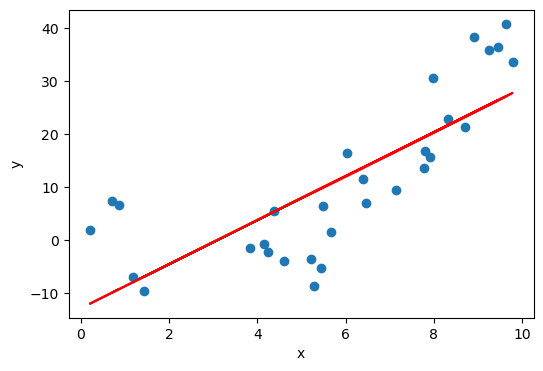

In [23]:

regr = LinearRegression()
regr.fit(x, y)
print('w_1 = {:.2f}'.format(regr.coef_.item()))
print('b = {:.2f}'.format(regr.intercept_.item()))

predictions = regr.predict(x)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x, y)
ax.plot(x, predictions, '-r')
ax.set_xlabel('x')
ax.set_ylabel('y')

### 3.2) Non-linear regression: polynomial fitting
We can extend the class of linear models by considering linear combinations of a set of fixed non-linear functions, or basis functions, (see Bishop section 3.1 for more information on basis functions) applied to the input data. Examples of basis functions include the Gaussian basis function and sigmoid basis function but here we will use a polynomial basis function (see Bishop section 3.1 for more details of basis functions). The purpose for doing this is to transform the data into a higher dimensional space such that a linear function can be fit to it.

To fit a polynomial function, we use the following matrix $\Phi$ with the rows $\phi$ consisting of the polynomial basis function.

$$
\Phi = \left[ \begin{array}{ccccc}
        \phi_1(x^{(1)}) & \phi_2(x^{(1)}) & \phi_3(x^{(1)}) & \cdots & \phi_K(x^{(1)}) & \\
        \phi_1(x^{(2)}) & \phi_2(x^{(2)}) & \phi_3(x^{(2)}) & \cdots & \phi_K(x^{(2)}) & \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        \phi_1(x^{(N)}) & \phi_2(x^{(N)}) & \phi_3(x^{(N)}) & \cdots & \phi_K(x^{(N)}) & \\
        \end{array} \right] =
        \left[ \begin{array}{ccccc}
        1 & x^{(1)} & {(x^{(1)})}^2 & \cdots & {(x^{(1)})}^{K-1} \\
        1 & x^{(2)} & {(x^{(2)})}^2 & \cdots & {(x^{(2)})}^{K-1} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & x^{(N)} & {(x^{(N)})}^2 & \cdots & {(x^{(N)})}^{K-1} \\
        \end{array} \right]   
$$

$$ f(\mathbf{x}) = \mathbf{w}^T \phi (\mathbf{x}) \qquad(4) $$

Notice that the function we are fitting now is non-linear in $\mathbf{x}$ but we can still apply linear regression in the same way as before because the function is still linear in both $\phi(\mathbf{x})$ and $\mathbf{w}$.

Use scikit-learn [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomial#sklearn.preprocessing.PolynomialFeatures) to fit a second order polynomial to the data, plot the fit line.

ValueError: x and y must be the same size

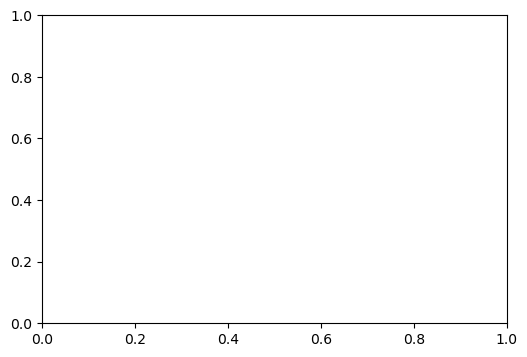

In [32]:
# write your code here
pol = PolynomialFeatures(degree=2)
x_poly = pol.fit_transform(x)
regr.fit(x_poly, y)
x_plot = np.linspace(0,10,200).reshape(-1, 1)


predictions = regr.predict(pol.transform(x_plot))

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x_, y)
ax.plot(x, predictions, '-r')
ax.set_xlabel('x')
ax.set_ylabel('y')

Increase the order of the polynomial. When does the model start to overfit? Which order of polynomial would you use?

## Wrap up

That's it for lab 1, a revision of Jupyter Notebooks and NumPy as well as an introduction to Scikit-learn and regression. We have covered:
- The interactive coding environment of Jupyter Notebooks which allows Markdown and $\LaTeX$ to be added to code. Notebooks show the results of your computation right below your code which is great for quick coding experiments and debugging. These features allow Notebooks to be used to create human-readable documents containing visualiations of results and analysis.
- The NumPy package which performs a range of array operations, standardising the columns of an array and reshaping an image array into a column vector.
- The  machine learning library Scikit-learn which can be used to import datasets, perform data preprocessing and then train and evaluate models. We went through a basic machine learning pipeline with the California housing dataset.
- We finally built a linear regression model from scratch by least squares fitting. Then, we used scikit-learn to fit the same function with only a couple lines of code and used the same methodology to fit a non-linear function after a polynomial transformation. 

### References
- Bishop Pattern Recognition and Machine Learning: Chapter 3 for linear regression, 

#### Materials used to create the lab
- University of Bristol's Symbols, Patterns and Signals course
- Andrew Ng's Neural Networks and Deep Learning course on Coursera